<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
      4D Analytics using the New York City Taxi dataset --Temporal and Timeseries
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233c'><b>Introduction</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
This is a demonstration of Vantage capabilities for
    <ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
<li>Temporal using the PERIOD data type, CONTAINS, OVERLAPS and EXPAND</li>
        <li>Timeseries and Primary Time Index</li>
        </ul>
    </p>
    

<hr style='height:2px;border:none;background-color:#00233C;'>
<p style = 'font-size:28px;font-family:Arial;color:#00233c'><b>1. Connect to Vantage</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press the Enter key, then use down arrow to go to next cell.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>

In [2]:
SET query_band='DEMO=NYC_Taxi_Temporal_SQL.ipynb;' UPDATE FOR SESSION;

Success: 1 rows affected

<hr style='height:1px;border:none;background-color:#00233C;'>

<p style = 'font-size:18px;font-family:Arial;color:#00233c'> <b>1.1 Getting Data for This Demo</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. In this demo since we are using Temporal table we will be creating databases and tables in local storage and use them in the notebook. Please execute the procedure in the next cell.</p>

In [3]:
-- call get_data('DEMO_NYCTaxi_cloud');    -- Takes about 2 minutes
call get_data('DEMO_NYCTaxi_local');    -- takes about 3 minutes

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:41.71 with 15 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optional step – if you want to see status of databases/tables created and space used.</p>

In [4]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=4 #tables=9 #views=22 You have used 137.8 MB of 30,678.9 MB available - 0.4% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 3 16 30,481.6 MB 3.7 MB"
5,DEMO_NYCTaxi 0 2 0.0 MB 0.0 MB
6,DEMO_NYCTaxi_db 2 0 101.4 MB 68.9 MB
7,DEMO_Retail 0 4 0.0 MB 0.0 MB
8,DEMO_Retail_db 4 0 95.9 MB 65.2 MB


<hr style='height:1px;border:none;background-color:#00233C;'>

<p style = 'font-size:18px;font-family:Arial;color:#00233c'> <b>1.2 Access data in Vantage  </b> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let us check the data sample. This demonstration will use two tables: the taxi trip details and the fares for each trip. The queries below will sample each table and then show the range of the time period covered by the data. </p>

In [5]:
SELECT TOP 5 * from DEMO_NYCTaxi.Trip;

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1,AAC26FD8FF0C03D8D1CC093A39489BE2,CA0D6019D8C38B1BCE8589772A86335D,VTS,1,,2013-11-10 09:34:00.000000,2013-11-10 09:49:00.000000,1,900,2.44,-73.971504,40.755905,-73.998535,40.719654
2,AAC26FD8FF0C03D8D1CC093A39489BE2,9EA0503A8DCFE4431E08078069C5932E,VTS,1,,2013-11-09 21:39:00.000000,2013-11-09 21:57:00.000000,1,1080,3.99,-73.980911,40.725536,-73.991974,40.687321
3,AAC26FD8FF0C03D8D1CC093A39489BE2,CA0D6019D8C38B1BCE8589772A86335D,VTS,1,,2013-11-10 10:09:00.000000,2013-11-10 10:14:00.000000,1,300,0.74,-73.997948,40.735802,-73.99157,40.744717
4,AAC26FD8FF0C03D8D1CC093A39489BE2,CA0D6019D8C38B1BCE8589772A86335D,VTS,1,,2013-11-10 14:22:00.000000,2013-11-10 14:32:00.000000,1,600,1.86,-73.997467,40.749416,-73.983871,40.769737
5,AAC26FD8FF0C03D8D1CC093A39489BE2,CA0D6019D8C38B1BCE8589772A86335D,VTS,1,,2013-11-10 07:08:00.000000,2013-11-10 07:23:00.000000,1,900,3.26,-73.961586,40.764507,-73.994331,40.732189


In [6]:
SELECT TOP 5 * from DEMO_NYCTaxi.Trip_Fare;

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
1,D8CF1B054D38736E4A4CCDADA52D9119,2862908C4E8E22B8A363B11BCFA215B7,VTS,2013-11-10 00:07:00.000000,CSH,32.5,0.5,0.5,0,5.33,38.83
2,D8CF1B054D38736E4A4CCDADA52D9119,00252C45FBF4B506460CE17302A0D191,VTS,2013-11-09 20:03:00.000000,CRD,16.5,0.5,0.5,3.4,0,20.9
3,D8CF1B054D38736E4A4CCDADA52D9119,2862908C4E8E22B8A363B11BCFA215B7,VTS,2013-11-10 02:31:00.000000,CRD,31.5,0,0.5,7.37,5.33,44.7
4,D8CF1B054D38736E4A4CCDADA52D9119,2862908C4E8E22B8A363B11BCFA215B7,VTS,2013-11-09 22:03:00.000000,CRD,7.5,0.5,0.5,1,0,9.5
5,D8CF1B054D38736E4A4CCDADA52D9119,00252C45FBF4B506460CE17302A0D191,VTS,2013-11-09 19:32:00.000000,CRD,6,0.5,0.5,1.62,0,8.62


In [7]:
SELECT MIN(pickup_datetime), MAX(dropoff_datetime) from DEMO_NYCTaxi.Trip;

,pickup_datetime,dropoff_datetime
1,2013-11-09 17:19:44.000000,2013-11-10 20:36:03.000000


<hr style='height:2px;border:none;background-color:#00233C;'>
<p style = 'font-size:28px;font-family:Arial;color:#00233c'><b>2. Warmup: temporal algebra </b></p>
<img  src="contains.png" alt="Contains Example" width="600" align="right" />
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> Let's warmup with a bit of temporal algebra and get familiar with period types and operators. 
<br><br>
For a taxi service, the number of dispatchers needed is impacted by the number of pickups. While some pickups are based on a taxi stand or someone waving their hand along the side of the street, the driver calls in the trip. 
<br><br>The period data type may be based on dates or timestamps and has a beginning bound and extends up to, but does not include the ending bound value. The ending bound may be expressed as "UNTIL_CHANGED" or "UNTIL CLOSED" which effectively means "forever". Most commonly, the period data type would appear in a table but in the example below, we will use a literal to count the number of taxi pickups between 10:30 and 10:45 on Nov 10th.</p>

In [8]:
SELECT COUNT(1)
FROM
    DEMO_NYCTaxi.Trip
-- WHERE pickup_datetime BETWEEN '2013-11-10 10:30:00' AND '2013-11-10 10:45:00'
-- Here is an alternative to the above using the period data type
WHERE
    PERIOD('2013-11-10 10:30:00' (TIMESTAMP), '2013-11-10 10:45:00' (TIMESTAMP)) CONTAINS pickup_datetime;

,Count(1)
1,5736


<img  src="contains-period.png" alt="Contains Period Example" width="600" align="right" />
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> 
The above example used CONTAINS for a simple comparison to a date which is easily replaced by BETWEEN.  A more interesting case is when two periods are in a constraint which would be more complicated logic.  The following query analyzes how many rides started and ended between 10:30 and 10:45 on Nov 10th.

In [9]:
SELECT COUNT(1)
FROM
    DEMO_NYCTaxi.Trip
WHERE
    pickup_datetime < dropoff_datetime
AND
    PERIOD('2013-11-10 10:30:00' (TIMESTAMP), '2013-11-10 10:45:00' (TIMESTAMP)) CONTAINS PERIOD(pickup_datetime, dropoff_datetime);

,Count(1)
1,1738


<img  src="overlap.png" alt="Overlap Example" width="600" align="right" />
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> 
The taxi cabs now contain video screens that include advertising content. To analyze the number of people that may be viewing the video to justify compensation for advertising, we need to know how many people are in the cabs in a given period. 
<br><br>
Where the CONTAINS operator above says that the timestamp or period must be within the bounds of the period, the OVERLAPS operator selects any rows where the row's period begins, ends, or overlaps the constraint period.  In the following example, we count how many passengers were in a taxi between 10:30 and 10:45 on Nov 10th.

In [10]:
SELECT SUM(passenger_count)
FROM
    DEMO_NYCTaxi.Trip
WHERE
    pickup_datetime < dropoff_datetime
    AND
    PERIOD('2013-11-10 10:30:00' (TIMESTAMP), '2013-11-10 10:45:00' (TIMESTAMP))
        OVERLAPS PERIOD(pickup_datetime, dropoff_datetime);

,passenger_count
1,20106


<img  src="normalize.png" alt="Overlap Example" width="600" align="right" />
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> 
As input to the hours of operations, management would like to know how many hours in the day there is at least 1 taxi operating.
<br><br>
Let's assume we run the fleet of the 3 taxis identifiable by medallion starting with ‘007’. The fleet is considered active if at least 1 taxi is driving. For how long the fleet has been “active” on November 10th?
<br><br>
We will need to consolidate (or normalize) the periods where taxis are active and then find the duration of the resulting periods of activity. The final query will have nested derived tables, so we will start by showing a sample of the innermost query which will create a set of period on the date for the group of medallions:

In [11]:
SELECT TOP 5
    PERIOD(pickup_datetime, dropoff_datetime) AS norm_per
FROM 
    DEMO_NYCTaxi.Trip
WHERE 
    CAST(pickup_datetime AS DATE) = DATE '2013-11-10'
    AND medallion LIKE '007%'
ORDER BY 1;

,norm_per
1,"2013-11-10 00:13:04.000000,2013-11-10 00:30:10.000000"
2,"2013-11-10 02:04:45.000000,2013-11-10 02:10:52.000000"
3,"2013-11-10 02:13:00.000000,2013-11-10 02:35:00.000000"
4,"2013-11-10 02:16:20.000000,2013-11-10 02:22:33.000000"
5,"2013-11-10 02:23:30.000000,2013-11-10 02:38:48.000000"


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> We will then use the NORMALIZE modifier to consolidate the periods. With NORMALIZE, the result of the select is normalized on the first period column in the select list. Period values that meet or overlap are coalesced, that is, combined to form a period that
encompasses the individual period values.  For comparison, we will follow with a query that doesn't normalize which is the total hours of active service of all of the taxis. 

In [12]:
SELECT SUM(INTERVAL(normalized_periods) HOUR(2) TO MINUTE) AS normalized_activity
FROM (
    SELECT NORMALIZE PERIOD(pickup_datetime, dropoff_datetime) AS normalized_periods
    FROM
        DEMO_NYCTaxi.Trip
    WHERE
        CAST(pickup_datetime AS DATE) = DATE '2013-11-10'
        AND medallion LIKE '007%'
) d1
ORDER BY 1;

,normalized_activity
1,15:07


In [13]:
SELECT SUM(INTERVAL(PERIOD(pickup_datetime, dropoff_datetime)) HOUR TO MINUTE) AS total_activity
FROM
    DEMO_NYCTaxi.Trip
WHERE
    CAST(pickup_datetime AS DATE) = DATE '2013-11-10'
    AND medallion LIKE '007%';

,total_activity
1,27:06


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> The normalized activity consolidating all of the periods before summarizing is less than the total activity. 
<br><br>
There are situations where you need to see the state of the business at fixed intervals. For example: total inventory at the end of each week.  The EXPAND ON operator will create those routine periods for reporting. To demonstrate EXPAND ON, we will get a count of active cabs at the top of each hour.

In [14]:
SELECT begin_hour, COUNT(*)
FROM (
    SELECT begin(hour_check) AS begin_hour
    FROM DEMO_NYCTaxi.Trip  
    WHERE (pickup_datetime (DATE)) = '2013-11-10'
        AND medallion LIKE '007%'
    EXPAND ON PERIOD(pickup_datetime, dropoff_datetime) AS hour_check BY ANCHOR ANCHOR_HOUR
) a
GROUP BY 1
ORDER BY 1;

,begin_hour,Count(*)
1,2013-11-10 06:00:00.000000,3
2,2013-11-10 07:00:00.000000,1
3,2013-11-10 08:00:00.000000,2
4,2013-11-10 09:00:00.000000,2
5,2013-11-10 10:00:00.000000,1
6,2013-11-10 11:00:00.000000,1
7,2013-11-10 12:00:00.000000,1
8,2013-11-10 13:00:00.000000,3
9,2013-11-10 14:00:00.000000,2
10,2013-11-10 15:00:00.000000,2


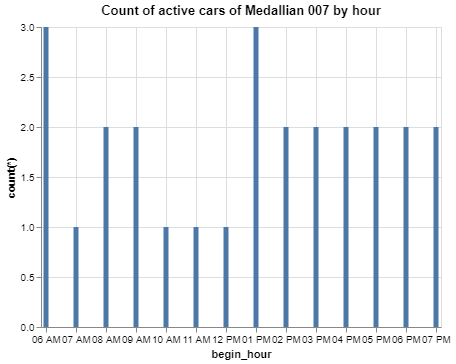

In [15]:
%chart x = begin_hour, y = count(*), title = "Count of active cars of Medallian 007 by hour", height = 300, width = 400

<hr style='height:2px;border:none;background-color:#00233C;'>
<p style = 'font-size:28px;font-family:Arial;color:#00233c'><b>3. Timeseries Analysis </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> Now we have seen the trip and fare details, Let's do some analysis based on time.
The query below issues a GROUP BY clause referencing a unit of time and includes a USING TIMECODE clause to specify a column that the unit grouping is to be applied to. <br><br>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>    
How many passengers are being picked up by hour?</p>

In [16]:
SELECT TOP 5
    EXTRACT(DAY FROM pickup_datetime),
    EXTRACT(HOUR FROM pickup_datetime),
    SUM(passenger_count)
FROM
    DEMO_NYCTaxi.Trip
GROUP BY 1, 2
ORDER BY 1, 2;

,pickup_datetime,pickup_datetime-1,passenger_count
1,9,17,14
2,9,18,13673
3,9,19,58635
4,9,20,51046
5,9,21,44277


In [17]:
SELECT TOP 72
       $TD_TIMECODE_RANGE,
       BEGIN($TD_TIMECODE_RANGE) AS time_bucket_start,    -- (timestamp, format 'YYYY-MM-DDBHH:MI:SS') time_bucket_start
       SUM(passenger_count) AS passenger_count
FROM
    DEMO_NYCTaxi.Trip
GROUP BY
    TIME(HOURS(1))
USING
    TIMECODE(pickup_datetime)
ORDER BY 1;

,TIMECODE_RANGE,time_bucket_start,passenger_count
1,"2013-11-09 17:00:00.000000-05:00,2013-11-09 18:00:00.000000-05:00",2013-11-09 17:00:00.000000-05:00,14
2,"2013-11-09 18:00:00.000000-05:00,2013-11-09 19:00:00.000000-05:00",2013-11-09 18:00:00.000000-05:00,13673
3,"2013-11-09 19:00:00.000000-05:00,2013-11-09 20:00:00.000000-05:00",2013-11-09 19:00:00.000000-05:00,58635
4,"2013-11-09 20:00:00.000000-05:00,2013-11-09 21:00:00.000000-05:00",2013-11-09 20:00:00.000000-05:00,51046
5,"2013-11-09 21:00:00.000000-05:00,2013-11-09 22:00:00.000000-05:00",2013-11-09 21:00:00.000000-05:00,44277
6,"2013-11-09 22:00:00.000000-05:00,2013-11-09 23:00:00.000000-05:00",2013-11-09 22:00:00.000000-05:00,34422
7,"2013-11-09 23:00:00.000000-05:00,2013-11-10 00:00:00.000000-05:00",2013-11-09 23:00:00.000000-05:00,22054
8,"2013-11-10 00:00:00.000000-05:00,2013-11-10 01:00:00.000000-05:00",2013-11-10 00:00:00.000000-05:00,9395
9,"2013-11-10 01:00:00.000000-05:00,2013-11-10 02:00:00.000000-05:00",2013-11-10 01:00:00.000000-05:00,7828
10,"2013-11-10 02:00:00.000000-05:00,2013-11-10 03:00:00.000000-05:00",2013-11-10 02:00:00.000000-05:00,10167


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>It's about time to add some visual element...

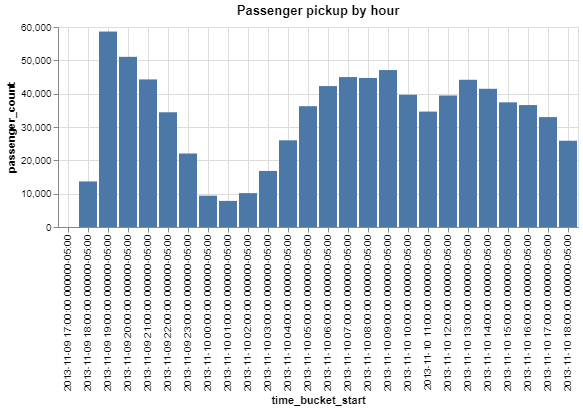

In [18]:
%chart x = time_bucket_start, y = passenger_count, title = "Passenger pickup by hour"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>How many passengers are being picked up and what is the average trip duration by vendor every 15min?

In [19]:
SELECT TOP 96
       $TD_TIMECODE_RANGE,
       vendor_id,
       SUM(passenger_count),
       AVG(trip_time_in_secs)
FROM
    DEMO_NYCTaxi.Trip
GROUP BY
    TIME(MINUTES(15) AND vendor_id)
USING
    TIMECODE(pickup_datetime)
ORDER BY 1,2;

,TIMECODE_RANGE,vendor_id,PASSENGER_COUNT,TRIP_TIME_IN_SECS
1,"2013-11-09 17:15:00.000000-05:00,2013-11-09 17:30:00.000000-05:00",CMT,1,1344
2,"2013-11-09 17:30:00.000000-05:00,2013-11-09 17:45:00.000000-05:00",CMT,1,5128
3,"2013-11-09 17:45:00.000000-05:00,2013-11-09 18:00:00.000000-05:00",VTS,12,4560
4,"2013-11-09 18:00:00.000000-05:00,2013-11-09 18:15:00.000000-05:00",CMT,15,3745.5714285714284
5,"2013-11-09 18:00:00.000000-05:00,2013-11-09 18:15:00.000000-05:00",VTS,21,3425.4545454545455
6,"2013-11-09 18:15:00.000000-05:00,2013-11-09 18:30:00.000000-05:00",CMT,91,2508.8166666666666
7,"2013-11-09 18:15:00.000000-05:00,2013-11-09 18:30:00.000000-05:00",VTS,176,2572.1428571428573
8,"2013-11-09 18:30:00.000000-05:00,2013-11-09 18:45:00.000000-05:00",CMT,931,1655.879661016949
9,"2013-11-09 18:30:00.000000-05:00,2013-11-09 18:45:00.000000-05:00",VTS,1360,1673.446153846154
10,"2013-11-09 18:45:00.000000-05:00,2013-11-09 19:00:00.000000-05:00",CMT,4450,962.5166380789022


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> Let's call this a view

In [20]:
REPLACE VIEW NYC_taxi_trip_ts AS
SELECT
  $TD_TIMECODE_RANGE time_bucket_per_15min,
  vendor_id,
  SUM(passenger_count) passenger_cnt,
  SUM(trip_time_in_secs) avg_trip_time_in_secs
FROM
    DEMO_NYCTaxi.Trip 
GROUP BY
    TIME(MINUTES(15) AND vendor_id)
USING
    TIMECODE(pickup_datetime);

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Moving Averages</b>
    <br>
 Let's calculate a 2 hours minutes moving average on our 15-minutes time series. 2 hour is 8 * 15 minutes periods.

In [21]:
SELECT TOP 5 * FROM MovingAverage (
    ON NYC_taxi_trip_ts
    PARTITION BY vendor_id ORDER BY time_bucket_per_15min
    USING
        MAvgType ('S')
        WindowSize (8)
        TargetColumns ('passenger_cnt')
) AS dt 
WHERE
    BEGIN(time_bucket_per_15min)(DATE) = '2013-11-10'
ORDER BY
    vendor_id,
    time_bucket_per_15min;

,time_bucket_per_15min,vendor_id,passenger_cnt,avg_trip_time_in_secs,passenger_cnt_smavg
1,"2013-11-10 00:00:00.000000-05:00,2013-11-10 00:15:00.000000-05:00",CMT,1000,518198,2452.5
2,"2013-11-10 00:15:00.000000-05:00,2013-11-10 00:30:00.000000-05:00",CMT,944,492988,2123.5
3,"2013-11-10 00:30:00.000000-05:00,2013-11-10 00:45:00.000000-05:00",CMT,878,476111,1835
4,"2013-11-10 00:45:00.000000-05:00,2013-11-10 01:00:00.000000-05:00",CMT,859,457154,1541
5,"2013-11-10 01:00:00.000000-05:00,2013-11-10 01:15:00.000000-05:00",CMT,768,425882,1252.75


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> We can use this to identify demand trends for each time period. A basic way to do this would be to check if the current pickup count is above (rising) or below (reducing) our moving average.

In [22]:
SELECT
    time_bucket_per_15min,
    vendor_id,
    passenger_cnt,
    CASE WHEN passenger_cnt - passenger_cnt_smavg > 0 THEN '+' ELSE '-' END trend
FROM MovingAverage (
    ON NYC_taxi_trip_ts
    PARTITION BY vendor_id
    ORDER BY time_bucket_per_15min
    USING
        MAvgType ('S')
        WindowSize (8)
        TargetColumns ('passenger_cnt')
) AS dt 
WHERE
    BEGIN(time_bucket_per_15min)(DATE) = '2013-11-10'
ORDER BY
    vendor_id,
    time_bucket_per_15min;

,time_bucket_per_15min,vendor_id,passenger_cnt,trend
1,"2013-11-10 00:00:00.000000-05:00,2013-11-10 00:15:00.000000-05:00",CMT,1000,-
2,"2013-11-10 00:15:00.000000-05:00,2013-11-10 00:30:00.000000-05:00",CMT,944,-
3,"2013-11-10 00:30:00.000000-05:00,2013-11-10 00:45:00.000000-05:00",CMT,878,-
4,"2013-11-10 00:45:00.000000-05:00,2013-11-10 01:00:00.000000-05:00",CMT,859,-
5,"2013-11-10 01:00:00.000000-05:00,2013-11-10 01:15:00.000000-05:00",CMT,768,-
6,"2013-11-10 01:15:00.000000-05:00,2013-11-10 01:30:00.000000-05:00",CMT,797,-
7,"2013-11-10 01:30:00.000000-05:00,2013-11-10 01:45:00.000000-05:00",CMT,839,-
8,"2013-11-10 01:45:00.000000-05:00,2013-11-10 02:00:00.000000-05:00",CMT,832,-
9,"2013-11-10 02:00:00.000000-05:00,2013-11-10 02:15:00.000000-05:00",CMT,931,+
10,"2013-11-10 02:15:00.000000-05:00,2013-11-10 02:30:00.000000-05:00",CMT,912,+


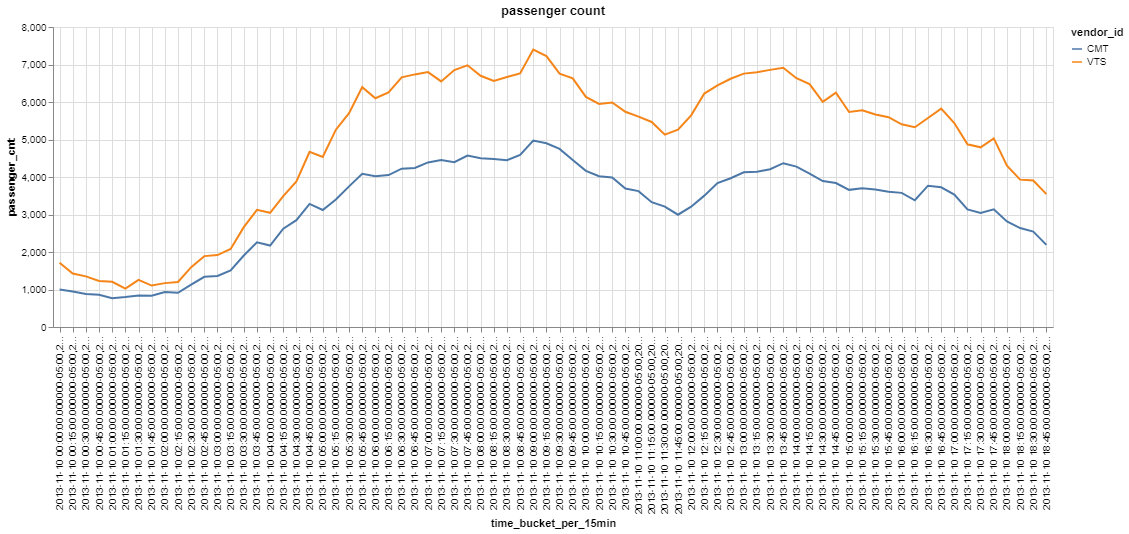

In [23]:
%chart x = time_bucket_per_15min, y = passenger_cnt, groupingcol = vendor_id,
mark = line, title = "passenger count", height = 300, width = 1000

<p style = 'font-size:16px;font-family:Arial;color:#00233C'> We can use this to compare how vendors are doing.

In [24]:
SELECT TOP 5 dt.*
FROM (
    SELECT
        time_bucket_per_15min,
        vendor_id,
        passenger_cnt,
        CASE WHEN passenger_cnt - passenger_cnt_smavg > 0 THEN '+' ELSE '-' END trend
    FROM MovingAverage (
    ON NYC_taxi_trip_ts
    PARTITION BY vendor_id
    ORDER BY time_bucket_per_15min
    USING
        MAvgType ('S')
        WindowSize (8)
        TargetColumns ('passenger_cnt')
    ) AS dt 
    WHERE
        BEGIN(time_bucket_per_15min)(DATE) = '2013-11-10'
) dt
PIVOT (
  MAX(passenger_cnt) AS passenger_cnt,
  MAX(trend) AS trend FOR vendor_id IN ('CMT', 'VTS')
) dt
ORDER BY 1;

,time_bucket_per_15min,'CMT'_passenger_cnt,'CMT'_trend,'VTS'_passenger_cnt,'VTS'_trend
1,"2013-11-10 00:00:00.000000-05:00,2013-11-10 00:15:00.000000-05:00",1000,-,1711,-
2,"2013-11-10 00:15:00.000000-05:00,2013-11-10 00:30:00.000000-05:00",944,-,1426,-
3,"2013-11-10 00:30:00.000000-05:00,2013-11-10 00:45:00.000000-05:00",878,-,1350,-
4,"2013-11-10 00:45:00.000000-05:00,2013-11-10 01:00:00.000000-05:00",859,-,1227,-
5,"2013-11-10 01:00:00.000000-05:00,2013-11-10 01:15:00.000000-05:00",768,-,1205,-


<hr style='height:2px;border:none;background-color:#00233C;'>
<p style = 'font-size:28px;font-family:Arial;color:#00233c'><b>4.  Clean up </b></p>
<p style = 'font-size:18px;font-family:Arial;color:#00233c'> <b>4.1 Database and Tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The following code will clean up tables and databases created above.</p>

In [25]:
call remove_data('DEMO_NYCTaxi');    -- Takes about 10 seconds, optional if you want to use the data later
-- Note that the same database & tables are used in Usecases/NYC-taxi-4d/NYC-taxi-geospatial.ipynb 

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_NYCTaxi. That ran for 0:00:02.40


<hr style='height:2px;border:none;background-color:#00233C;'>
<p style = 'font-size:28px;font-family:Arial;color:#00233c'><b>5. Conclusion</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
In this demonstration we have seen that Temporal and period datatype is time aware and the queries using the same are fairly simple and easy to use. We have also seen how we can create a time index and use it in queries. 

<hr style='height:1px;border:none;background-color:#00233C;'>

<p style = 'font-size:18px;font-family:Arial;color:#00233c'><b>5.2 Reference Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
        <li>Introduction to Teradata Time Series Tables and Operations: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Time-Series-Tables-and-Operations-17.20'>https://docs.teradata.com/r/Teradata-VantageTM-Time-Series-Tables-and-Operations-17.20</a></li>
</ul>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2023. All Rights Reserved
        </div>
    </div>
</footer>